## 1. Cargamos librerías y el dataset

In [3]:
# Importamos las librerías necesarias
import pandas as pd
#import geopandas
#import shapely.wkt
#import rtree
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 100
%matplotlib inline
pd.set_option("display.max_rows", 101)

In [4]:
# Levantamos el dataset
propiedades_original = pd.read_csv("properatti.csv"
           , encoding = 'utf-8')

## 2. Exploración inicial del dataset

In [5]:
# Asignamos el dataset original a uno nuevo sobre el cual vamos a trabajar
propiedades = propiedades_original

In [6]:
# Obtenemos la dimensión del dataset
propiedades.shape

(121220, 26)

In [7]:
# Consultamos información de las columnas
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [8]:
# Exploramos las primeras 10 filas
propiedades.head(10)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
5,5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...
6,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,78.0,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
9,9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15box_venta_casa_r...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://thumbs4.properati.com/8/RCf1YEWdF4rv98...


## 3. Análisis de datos faltantes y duplicados

In [9]:
# Consultamos si hay duplicados en toda la fila y si hay, los borramos
canti = propiedades.duplicated().sum()
if canti != 0:
    print("Existen ", canti, " filas duplicadas, se eliminan.")
    propiedades = propiedades.drop_duplicates()

In [10]:
# Consultamos si hay duplicados por la columna description y si hay, los borramos
canti = propiedades.duplicated(subset='description').sum()
if canti != 0:
    print("Existen ", canti, " filas duplicadas de acuerdo a su descripción, se eliminan.")
    propiedades = propiedades.drop_duplicates(subset='description', keep="last")

Existen  17164  filas duplicadas de acuerdo a su descripción, se eliminan.


In [11]:
# Vemos si hay alguna operación que no sea de venta y, de no haber ninguna, eliminamos la columna
canti = (propiedades['operation'] != 'sell').sum()
if canti == 0:
    propiedades.drop(['operation'], axis=1, inplace=True)    

/Users/Cristian/anaconda3/envs/dsdh-data/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
# Vemos si hay propiedades fuera de Argentina y, de no haber ninguna, eliminamos la columna y también la "place_with_parent_names"
canti = (propiedades['country_name'] != 'Argentina').sum()
if canti == 0:
    propiedades.drop(['country_name'], axis=1, inplace=True)

/Users/Cristian/anaconda3/envs/dsdh-data/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
# Analizamos la columna tipo de propiedad
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['property_type'].isnull())))
print(propiedades['property_type'].unique())

Cantidad de nulos en la serie: 0
['PH' 'apartment' 'house' 'store']


In [14]:
# Analizamos la columna ubicación-localidad
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['place_name'].isnull())))
print(propiedades['place_name'].unique())
print('Hay {} elementos distintos.'.format(propiedades['place_name'].unique().size))

Cantidad de nulos en la serie: 23
['Mataderos' 'La Plata' 'Liniers' ... 'Laguna Paiva' 'Malabrigo'
 'Altos de Hudson I']
Hay 1059 elementos distintos.


In [15]:
# Analizamos la columna ubicación completa
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['place_with_parent_names'].isnull())))
print(propiedades['place_with_parent_names'].unique())
print('Hay {} elementos distintos.'.format(propiedades['place_with_parent_names'].unique().size))

Cantidad de nulos en la serie: 0
['|Argentina|Capital Federal|Mataderos|'
 '|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|'
 '|Argentina|Capital Federal|Liniers|' ...
 '|Argentina|Santa Fe|Laguna Paiva|' '|Argentina|Santa Fe|Malabrigo|'
 '|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|Altos de Hudson I|']
Hay 1162 elementos distintos.


In [16]:
# Analizamos la columna ubicación-provincia
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['state_name'].isnull())))
print(propiedades['state_name'].unique())
print('Hay {} elementos distintos.'.format(propiedades['state_name'].unique().size))

Cantidad de nulos en la serie: 0
['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Entre Ríos' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Córdoba'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Buenos Aires Interior' 'Salta'
 'Neuquén' 'Río Negro' 'San Luis' 'Mendoza' 'Corrientes' 'Chubut'
 'Tucumán' 'La Pampa' 'Chaco' 'San Juan' 'Santa Cruz' 'Tierra Del Fuego'
 'Catamarca' 'Santiago Del Estero' 'Jujuy' 'La Rioja' 'Formosa']
Hay 28 elementos distintos.


In [17]:
# Analizamos la columna geonames_id
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['geonames_id'].isnull())))
print(propiedades['geonames_id'].unique())
print('Hay {} elementos distintos.'.format(propiedades['geonames_id'].unique().size))

Cantidad de nulos en la serie: 16666
[3430787. 3432039. 3431333. 3435548. 3433657. 3430511. 3436077. 3838574.
 3860259.      nan 3430813. 3430234. 3436061. 3427753. 3832729. 3433780.
 3435607. 3433918. 3429979. 3845202. 3435087. 3832791. 3429760. 6693228.
 3428983. 3435874. 3436508. 3430348. 3436042. 3436003. 3433359. 3430863.
 3429886. 3862356. 3429228. 3428113. 3436397. 3433955. 3427500. 3429971.
 3436080. 3435351. 3430982. 3837090. 3435907. 3431273. 3839996. 3427431.
 3436152. 3433323. 3838233. 3430310. 3836277. 3435356. 3433977. 3433910.
 3436048. 3856531. 3429651. 3429594. 3860360. 3855061. 3436109. 3856226.
 3436079. 3436134. 3429316. 3427463. 3429418. 3434158. 3429617. 3836951.
 3429595. 3836276. 3435259. 3435506. 3427458. 3435257. 3433775. 3832899.
 3844377. 3429902. 3429422. 3430570. 3835793. 3430387. 3865084. 3429088.
 3427354. 3843123. 3837856. 3430115. 3427467. 3433778. 3430087. 3436487.
 3429703. 3844421. 3854993. 3430550. 3428775. 3436033. 3427407. 3850312.
 3433321. 3845

In [18]:
# Analizamos la columna lat-lon
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['lat-lon'].isnull())))
print(propiedades['lat-lon'].unique())
print('Hay {} elementos distintos.'.format(propiedades['lat-lon'].unique().size))

Cantidad de nulos en la serie: 42236
['-34.6618237,-58.5088387' '-34.9038831,-57.9643295'
 '-34.6522615,-58.5229825' ... '-34.6299818267,-58.4574441003'
 '-34.6087030398,-58.476204069' '-34.6295045177,-58.460641832']
Hay 45691 elementos distintos.


In [19]:
# Analizamos la columna lat
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['lat'].isnull())))
print(propiedades['lat'].unique())
print('Hay {} elementos distintos.'.format(propiedades['lat'].unique().size))

Cantidad de nulos en la serie: 42236
[-34.6618237  -34.9038831  -34.6522615  ... -34.62998183 -34.60870304
 -34.62950452]
Hay 45060 elementos distintos.


In [20]:
# Analizamos la columna lon
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['lon'].isnull())))
print(propiedades['lon'].unique())
print('Hay {} elementos distintos.'.format(propiedades['lon'].unique().size))

Cantidad de nulos en la serie: 42236
[-58.5088387  -57.9643295  -58.5229825  ... -58.4574441  -58.47620407
 -58.46064183]
Hay 45102 elementos distintos.


In [21]:
# Analizamos la columna precio
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['price'].isnull())))

Cantidad de nulos en la serie: 15760


In [22]:
# Analizamos la columna moneda
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['currency'].isnull())))
print(propiedades['currency'].unique())
print('Hay {} elementos distintos.'.format(propiedades['currency'].unique().size))

Cantidad de nulos en la serie: 15761
['USD' nan 'ARS' 'PEN' 'UYU']
Hay 5 elementos distintos.


In [23]:
# Analizamos la columna precio en moneda local
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['price_aprox_local_currency'].isnull())))

Cantidad de nulos en la serie: 15760


In [24]:
# Analizamos la columna precio en dólares
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['price_aprox_usd'].isnull())))

Cantidad de nulos en la serie: 15760


In [25]:
# Analizamos la columna surface_total_in_m2
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['surface_total_in_m2'].isnull())))

Cantidad de nulos en la serie: 35507


In [26]:
# Analizamos la columna surface_covered_in_m2
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['surface_covered_in_m2'].isnull())))

Cantidad de nulos en la serie: 17383


In [27]:
# Analizamos la columna price_usd_per_m2
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['price_usd_per_m2'].isnull())))

Cantidad de nulos en la serie: 45029


In [28]:
# Analizamos la columna price_per_m2
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['price_per_m2'].isnull())))

Cantidad de nulos en la serie: 27664


In [29]:
# Analizamos la columna floor
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['floor'].isnull())))

Cantidad de nulos en la serie: 97995


In [30]:
# Analizamos la columna rooms
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['rooms'].isnull())))

Cantidad de nulos en la serie: 62640


In [31]:
# Analizamos la columna expenses
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['expenses'].isnull())))

Cantidad de nulos en la serie: 90877


In [32]:
# Analizamos la columna properati_url
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['properati_url'].isnull())))

Cantidad de nulos en la serie: 0


In [33]:
# Analizamos la columna description
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['description'].isnull())))

Cantidad de nulos en la serie: 1


In [34]:
# Analizamos la columna title
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['title'].isnull())))

Cantidad de nulos en la serie: 0


In [35]:
# Analizamos la columna image_thumbnail
print('Cantidad de nulos en la serie: {0}'.format(sum(propiedades['image_thumbnail'].isnull())))

Cantidad de nulos en la serie: 2160


In [36]:
# Vemos las columnas donde hay Nulos y su cantidad, tambien definimos la variable null columns
null_columns=propiedades.columns[propiedades.isnull().any()]
propiedades[null_columns].isnull().sum()

place_name                       23
geonames_id                   16666
lat-lon                       42236
lat                           42236
lon                           42236
price                         15760
currency                      15761
price_aprox_local_currency    15760
price_aprox_usd               15760
surface_total_in_m2           35507
surface_covered_in_m2         17383
price_usd_per_m2              45029
price_per_m2                  27664
floor                         97995
rooms                         62640
expenses                      90877
description                       1
image_thumbnail                2160
dtype: int64

In [37]:
# CAMBIO DE VALORES NAN DE PLACE_NAME
# Aunque la ubicacion no aparece escrita, si aparecen las coordenadas
# Estas coordenadas pertenecen a Nordelta por lo que procedemos a cambiar el place name por Nordelta  

print(propiedades[propiedades["place_name"].isnull()][null_columns])
propiedades['place_name'] = propiedades['place_name'].replace(np.nan, 'Nordelta')
print(propiedades.loc[propiedades['place_name'] == 'Nordelta'])


      place_name  geonames_id                        lat-lon        lat  \
6489         NaN          NaN    -34.4008968545,-58.63809847 -34.400897   
10201        NaN          NaN          -34.400704,-58.638067 -34.400704   
11451        NaN          NaN  -34.4026880384,-58.6262613379 -34.402688   
14839        NaN          NaN  -34.4007994779,-58.6381735719 -34.400799   
18622        NaN          NaN  -34.4032781195,-58.6263503945 -34.403278   
21922        NaN          NaN          -34.399704,-58.638405 -34.399704   
23664        NaN          NaN  -34.4005161998,-58.6417999185 -34.400516   
24722        NaN          NaN        -34.4007292,-58.6377783 -34.400729   
38856        NaN          NaN         -34.425087,-58.5796585 -34.425087   
45970        NaN          NaN           -34.396074,-58.63738 -34.396074   
46642        NaN          NaN          -34.400749,-58.638754 -34.400749   
53130        NaN          NaN          -34.400978,-58.637809 -34.400978   
55306        NaN         

        Unnamed: 0 property_type place_name  \
104            104         house   Nordelta   
234            234         house   Nordelta   
324            324         house   Nordelta   
408            408     apartment   Nordelta   
415            415     apartment   Nordelta   
418            418     apartment   Nordelta   
512            512         house   Nordelta   
571            571     apartment   Nordelta   
572            572     apartment   Nordelta   
574            574     apartment   Nordelta   
575            575     apartment   Nordelta   
577            577     apartment   Nordelta   
578            578     apartment   Nordelta   
579            579     apartment   Nordelta   
580            580     apartment   Nordelta   
585            585     apartment   Nordelta   
586            586         house   Nordelta   
587            587         house   Nordelta   
594            594     apartment   Nordelta   
597            597     apartment   Nordelta   
598          

/Users/Cristian/anaconda3/envs/dsdh-data/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
# Vemos las filas a las que le faltan el precio
# Para mejorar la síntesis de nuestro análisis vamos a considerar solamente los barrios en Capital Federal
# También vamos a cambiar el #Nan# de los precios de la siguiente forma. Para que los valores faltantes 
# sean representativos en relacion a la muestra que tenemos; ante valores de distribución normal usaremos la media, 
# pero si la muestra tiene una distribución heterogénea usaremos la mediana
propiedades = propiedades.drop(propiedades[propiedades.state_name!='Capital Federal'].index)
propiedades.shape

(26090, 24)

In [39]:
print(propiedades[propiedades["price_aprox_usd"].isnull()][null_columns])

               place_name  geonames_id                        lat-lon  \
214             Caballito    3435874.0        -34.6209278,-58.4458736   
217             Caballito    3435874.0        -34.6209278,-58.4458736   
223              Belgrano    3436077.0        -34.5645474,-58.4488985   
414         Palermo Chico          NaN           -34.58522,-58.426652   
544          Villa Devoto    3427451.0         -34.5937437,-58.518665   
545          Villa Devoto    3427451.0        -34.6024289,-58.5171985   
546          Villa Devoto    3427451.0        -34.6024289,-58.5171985   
547          Villa Devoto    3427451.0        -34.6024289,-58.5171985   
548          Villa Devoto    3427451.0        -34.6007413,-58.5035408   
549             Caballito    3435874.0        -34.6089437,-58.4443642   
550          Villa Devoto    3427451.0        -34.5968795,-58.5118395   
551          Villa Devoto    3427451.0        -34.5986087,-58.5182782   
652             Caballito    3435874.0        -34.6

Text(0.5, 1.0, 'Relacion enre precio por zona')

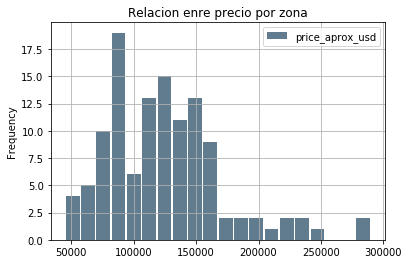

In [40]:
df2 = propiedades.loc[(propiedades['place_name'] == 'Mataderos') & (propiedades['property_type'] == 'PH')]
df3 =df2[['place_name', 'price_aprox_usd','property_type']] 

# Hacemos un histograma en relacion al precio
size, scale = 1000, 10

df3.plot.hist(grid=True, bins=20, rwidth=0.9,
                  color='#607c8e')
plt.title('Relacion enre precio por zona')
# Como podemos ver la distribucion para del precio en el barrio de Mataderos no es normal por lo que tomariamos la Mediana para cambiar los precios faltantes en ese barrio


Text(0.5, 1.0, 'Relacion enre precio por zona')

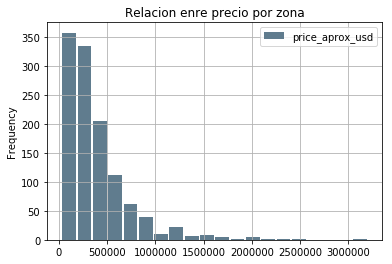

In [41]:
# Vamos a tomar 2 muestras mas aleatorias: si las dos dan dan distribuciones no normales 
# tomaremos la mediana para reemplazar los valores nulos
df2 = propiedades.loc[(propiedades['place_name'] == 'Recoleta') & (propiedades['property_type'] == 'apartment')]
df3 =df2[['place_name', 'price_aprox_usd','property_type']] 

### Hacemos un histograma en relacion al precio####
size, scale = 1000, 10

df3.plot.hist(grid=True, bins=20, rwidth=0.9,
                  color='#607c8e')
plt.title('Relacion enre precio por zona')

Text(0.5, 1.0, 'Relacion enre precio por zona')

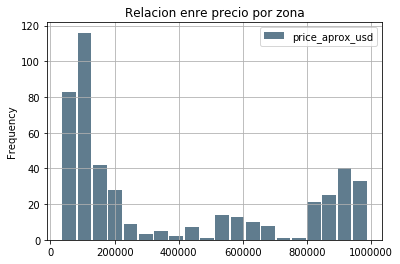

In [42]:
df2 = propiedades.loc[(propiedades['place_name'] == 'San Cristobal') & (propiedades['property_type'] == 'apartment')]
df3 =df2[['place_name', 'price_aprox_usd','property_type']] 

### Hacemos un histograma en relacion al precio####
size, scale = 1000, 10

df3.plot.hist(grid=True, bins=20, rwidth=0.9,
                  color='#607c8e')
plt.title('Relacion enre precio por zona')

In [43]:
# Revisamos las medianas por barrio y tipo de propiedad
propiedades2 = propiedades[['place_name', 'property_type','price_aprox_usd']].groupby(['place_name', 'property_type']).aggregate([np.median])
propiedades2

price_aprox_usd
                                            median
place_name           property_type                
Abasto               PH                  160000.00
                     apartment           127500.00
                     house               490000.00
                     store               380000.00
Agronomía            PH                  220000.00
                     apartment           130000.00
                     house               432500.00
                     store               420000.00
Almagro              PH                  220000.00
                     apartment           125000.00
                     house               450000.00
                     store               192500.00
Balvanera            PH                  150000.00
                     apartment           113000.00
                     house               248500.00
                     store               340000.00
Barracas             PH                  150000.00
                     apartment           132050.00
                     house               260000.00
                     store               265000.00
Barrio Norte         PH                  187500.00
                     apartment           225000.00
                     house               895000.00
                     store               225000.00
Belgrano             PH                  294500.00
                     apartment           215356.20
                     house               845000.00
                     store               209000.00
Boca                 PH                  134950.00
                     apartment            92000.00
                     house               216000.00
                     store               160000.00
Boedo                PH                  155000.00
                     apartment           222500.00
                     house               350000.00
                     store               185000.00
Caballito            PH                  199000.00
                     apartment           140000.00
                     house               400000.00
                     store               181755.50
Capital Federal      PH                  150000.00
                     apartment           140000.00
                     house               495000.00
                     store               272000.00
Catalinas            apartment           550000.00
                     store               350000.00
Centro / Microcentro apartment           107981.00
                     house               820000.00
                     store               270000.00
Chacarita            PH                  191500.00
...                                            ...
Versalles            house               303500.00
Villa Crespo         PH                  163500.00
                     apartment           125929.00
                     house               460000.00
                     store               250000.00
Villa Devoto         PH                  173500.00
                     apartment           125000.00
                     house               358000.00
                     store               235000.00
Villa General Mitre  PH                  197500.00
                     apartment            99500.00
                     house               320000.00
Villa Lugano         PH                  125000.00
                     apartment            76500.00
                     house               195000.00
                     store                80000.00
Villa Luro           PH                  149000.00
                     apartment           113500.00
                     house               320000.00
                     store               347500.00
Villa Ortuzar        PH                  230000.00
                     apartment           107000.00
                     house               410000.00
                     store               370000.00
Villa Pueyrredón     PH                  193950.00
      

In [44]:
# Reemplazamos por la mediana en los campos cuyo precio en dólares sea NAN (este paso tarda unos minutos)
def completa_nan(valor, str_place_name,str_property_type):
    df2 = propiedades.loc[(propiedades['place_name'] == str_place_name) & (propiedades['property_type'] == str_property_type)]
    return df2.price_aprox_usd.median()

# Pruebita
#completa_nan(np.nan,"Abasto","PH")
propiedades["price_aprox_usd"] = propiedades["price_aprox_usd"].apply(lambda X: completa_nan(X, propiedades.place_name, propiedades.property_type) if np.isnan(X) else X)

In [45]:
# Con estos cambios modificamos los valores Null en relacion al lugar y al Precio Null que son los que principalmente 
# vamos a usar en el analisis - Las demas columnas nose cambiaran debido a que los datos faltantes que no pueden 
# ser reemplazados representativamente o los valores de los datos de esas columnas no van a ser usadas para el analisis

# Columnas geonames_id, lat-lon, lat, lon ---> No es necesario el cambio al tener definidos el Place_name para el analisis

# Columnas Currency, price,price_aprox_local_currency --> Vamos a usar price_aprox_USD para el analisis

# Columnas surface_total_in_m2, surface_covered_in_m2,price_usd_per_m2, price_per_m2 * --> No hay forma de conseguir un valor representativo de los que faltan

# Columnas Floor, rooms ---> No se puede inferir con certeza que representan en relacion a los apartmentos por lo que no tomaremos para nuestro analisis

# Columnas expenses ---> Presenta una gran cantidad de datos faltantes que no pueden ser reemplazados representativamente / No se va na tomar para el analisis

# Columnas description ---> Las descripciones son valores cualitiativos dependiendo del aviso por lo que no pueden tomarse un reemplazo

# Columnas image_thumbnail ---> Son links individuales por lo que no va na ser reemplazadas


## 3. Nuevas columnas

In [46]:
# A partir de la columna description obtenemos información nueva utilizando regex y funciones que buscan textos específicos

In [47]:
# Vemos la columna
propiedades.description

0         2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...
2         2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
3         PH 3 ambientes con patio. Hay 3 deptos en lote...
7         EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...
8         EXCELENTE DOS AMBIENTES  ESTRENAR AMPLIO SUPER...
13         Torre I Mondrian. 3 ambientes con terraza y d...
14        Torre II Dalí. Ambiente unico divisible.Vitrau...
16        Ventas Mataderos al frente Duplex 4 amb.- Plan...
19        Excelente semipiso al contra frente en Bulnes ...
21        EXCELENTE ZONA, MULTIPLES MEDIOS DE TRANSPORTE...
29        Departamento muy luminoso con todos sus ambien...
38        Espectacular loft de exclusivo diseño, 210 ms,...
47        ESTRUCTURA ECOLOGICA FLOTANTEIDEAL PARA UBICAR...
48        PISO 13, Orientación norte, disposición al fre...
52        Departamento de 3 Ambientes al Contrafrente. S...
53        14 exclusivos semi-pisos.Excelentes detalles d...
55        Excelentes detalles de termina

In [48]:
# Definimos una función que dado un texto lo normaliza para hacer más fácil la generación de columnas nuevas
def normalizar(str_x):    
    if isinstance(str_x, str):
        str_x = str_x.lower()
        str_x = str_x.replace(" amb "," ambientes ")
        str_x = str_x.replace(" amb. "," ambientes ")
        str_x = str_x.replace(" ambientesientes "," ambientes ")
        str_x = str_x.replace(" depto "," departamento ")
        str_x = str_x.replace(" depto. "," departamento ")
        str_x = str_x.replace(" dorm "," dormitorio ")
        str_x = str_x.replace(" dorm. "," dormitorio ")
        str_x = str_x.replace(" dormitorioss "," dormitorios ")
        str_x = str_x.replace(" bano "," baño ")
        str_x = str_x.replace(" banos "," baños ")
        str_x = str_x.replace(" garage "," cochera ")
        str_x = str_x.replace(" laundry "," lavadero ")
        str_x = str_x.replace(" piscina "," pileta ")
        str_x = str_x.replace(" apto credito "," apto crédito ")

    return str_x

# Invocamos la función para las columnas description y title
propiedades["description"] = propiedades.description.apply(normalizar)
propiedades["title"] = propiedades.title.apply(normalizar)

#propiedades.head(10)

In [49]:
# Generamos una función genérica para buscar textos y devolver la cantidad de ocurrencias
def buscar_con_canti(X, str_busqueda):
    if isinstance(X, str):
        #return str_busqueda in X
        return sum([1 for i in X.split() if str_busqueda in i.lower()])
    else:
        return 0
    
# Generamos una función genérica para buscar textos y devolver true o false si aparece
def buscar_sin_canti(X, str_busqueda):
    if isinstance(X, str):
        return str_busqueda in X
    else:
        return False

In [50]:
# Intentamos obtener la cantidad de baños
propiedades["Baño"] = propiedades.description.apply(buscar_con_canti,str_busqueda='baño')

# Intentamos saber si tiene cochera
propiedades["Cochera"] = propiedades.description.apply(buscar_sin_canti,str_busqueda='cochera')

# Intentamos saber si tiene pileta
propiedades["Pileta"] = propiedades.description.apply(buscar_sin_canti,str_busqueda='pileta')

# Intentamos saber si tiene dependencia
propiedades["Con dependencia"] = propiedades.description.apply(buscar_sin_canti,str_busqueda='con dependencia')

# Intentamos saber si tiene patio
propiedades["Patio"] = propiedades.description.apply(buscar_sin_canti,str_busqueda='patio')

# Intentamos saber si es apto crédito
propiedades["Apto crédito"] = propiedades.description.apply(buscar_sin_canti,str_busqueda='apto crédito')

# Intentamos saber si es luminoso
propiedades["Luminoso"] = propiedades.description.apply(buscar_sin_canti,str_busqueda='luminoso')

propiedades.head(12)

,Unnamed: 0,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,...,description,title,image_thumbnail,Baño,Cochera,Pileta,Con dependencia,Patio,Apto crédito,Luminoso
0,0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,"2 ambientes tipo casa planta baja por pasillo,...",2 ambientes tipo casa sin expensas en pb,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,1,False,False,False,True,True,False
2,2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,2 ambientes 3er piso lateral living comedor am...,2 ambientes 3er piso con ascensor apto credito,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,1,False,False,False,False,False,False
3,3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,...,ph 3 ambientes con patio. hay 3 deptos en lote...,ph 3 ambientes cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,0,False,False,False,True,False,False
7,7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,...,excelente monoambiente a estrenar amplio super...,jose hernandez 1400 monoambiente estrenar cat...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,1,False,True,False,False,False,True
8,8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,...,excelente dos ambientes estrenar amplio super...,"jose hernandez 1400 dos ambientes estrenar ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,1,False,True,False,False,False,True
13,13,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,3430234.0,NaN,NaN,NaN,111700.0,...,torre i mondrian. 3 ambientes con terraza y d...,vitraux palermo,https://thumbs4.properati.com/2/ZTUjkRzTz6YvcU...,1,False,True,False,False,False,False
14,14,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Capital Federal,3430234.0,NaN,NaN,NaN,147900.0,...,torre ii dalí. ambiente unico divisible.vitrau...,vitraux palermo,https://thumbs4.properati.com/8/Uay2dC732CNlRw...,0,False,True,False,False,False,False
16,16,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6523561177,-58.5016239381",-34.652356,-58.501624,239000.0,...,ventas mataderos al frente duplex 4 amb.- plan...,venta-mataderos-duplex 4 amb.,https://thumbs4.properati.com/7/XSdJtiE8ZkWgon...,1,False,False,False,False,False,False
19,19,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,3430234.0,"-34.580503566,-58.4058744847",-34.580504,-58.405874,350000.0,...,excelente semipiso al contra frente en bulnes ...,"bulnes y libertador: espectacular pulmón, con ...",https://thumbs4.properati.com/8/1y9fKHLee-aQQj...,1,False,False,False,False,False,True
21,21,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,3430234.0,"-34.590926,-58.4116653",-34.590926,-58.411665,270500.0,...,"excelente zona, multiples medios de transporte...",departamento de 4 ambientes en venta en palermo,https://thumbs4.properati.com/0/P6wPIXB1wJFLVU...,0,False,False,False,True,False,False


## 5. Agrupamos datos utilizando distintas columnas

In [51]:
# Agrupamos por tipo de propiedad para obtener la media del precio por metro cuadrado para cada tipo de propiedad
propiedades.groupby('property_type')['price_usd_per_m2'].mean()

property_type
PH           1684.215922
apartment    3355.893161
house        1484.127376
store        2883.497314
Name: price_usd_per_m2, dtype: float64

In [52]:
# Agrupamos por tipo de propiedad y zona para obtener la media del precio por metro cuadrado para cada tipo de propiedad y zona
propiedades.groupby(["property_type", "state_name"])["price_usd_per_m2"].mean()

property_type  state_name     
PH             Capital Federal    1684.215922
apartment      Capital Federal    3355.893161
house          Capital Federal    1484.127376
store          Capital Federal    2883.497314
Name: price_usd_per_m2, dtype: float64

## 6. Análisis descriptivo 

In [53]:
propiedades.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,Baño
count,26090.000000,2.511300e+04,20144.000000,20144.000000,2.420600e+04,2.420600e+04,2.609000e+04,20556.000000,24337.000000,18912.000000,2.272200e+04,2730.000000,13136.000000,5.898000e+03,26090.000000
mean,59416.092181,3.539535e+06,-34.601312,-58.436334,3.644913e+05,4.918669e+06,2.705499e+05,132.263232,105.915766,3104.610137,5.529036e+03,13.451648,2.808009,5.108512e+03,0.858145
std,34221.657877,5.812533e+05,0.038033,0.054803,8.733518e+05,8.384791e+06,4.586734e+05,1414.772871,1216.455696,3556.450705,2.389564e+04,86.350140,1.558546,1.302503e+05,0.952995
min,0.000000,3.427366e+06,-38.416097,-63.616672,5.500000e+03,9.005064e+04,5.103610e+03,0.000000,1.000000,13.797467,3.208556e+00,1.000000,1.000000,1.000000e+00,0.000000
25%,28979.500000,3.429760e+06,-34.620878,-58.466156,1.100000e+05,1.889527e+06,1.100000e+05,43.000000,40.000000,1909.090909,2.129032e+03,2.000000,2.000000,1.200000e+03,0.000000
50%,57260.500000,3.433775e+06,-34.601440,-58.435618,1.700000e+05,2.911342e+06,1.650000e+05,67.000000,59.000000,2437.500000,2.714286e+03,4.000000,3.000000,2.041000e+03,1.000000
75%,86777.750000,3.436003e+06,-34.581731,-58.403419,3.300000e+05,5.293350e+06,2.800000e+05,120.000000,102.000000,3087.820187,3.529412e+03,7.000000,4.000000,4.000000e+03,1.000000
max,121219.000000,6.693230e+06,-34.534530,-58.354956,5.000000e+07,8.212711e+08,4.654544e+07,200000.000000,187000.000000,173826.066667,2.600000e+06,2509.000000,22.000000,1.000150e+07,10.000000


In [55]:
#sns.barplot(propiedades_original["state_name"],)
#propiedades_original['state_name'].value_counts().plot(kind='bar',figsize=(17, 15))

In [56]:
df_plot = propiedades_original.groupby(['state_name', 'property_type']).size().reset_index().pivot(columns='property_type', index='state_name', values=0)
#df_plot['ventas_totales'] = df_plot.sum(axis=1)
df_plot

property_type,PH,apartment,house,store
state_name,,,,
Bs.As. G.B.A. Zona Norte,985.0,10622.0,13364.0,589.0
Bs.As. G.B.A. Zona Oeste,789.0,3618.0,4663.0,252.0
Bs.As. G.B.A. Zona Sur,821.0,5507.0,6985.0,639.0
Buenos Aires Costa Atlántica,575.0,6461.0,2685.0,285.0
Buenos Aires Interior,48.0,845.0,1325.0,73.0
Capital Federal,1828.0,27037.0,2087.0,1364.0
Catamarca,NaN,12.0,15.0,NaN
Chaco,NaN,19.0,35.0,3.0
Chubut,6.0,39.0,173.0,41.0


In [57]:
propiedades_original.groupby(['state_name','property_type']).count()

Unnamed: 0  operation  place_name  \
state_name                   property_type                                      
Bs.As. G.B.A. Zona Norte     PH                    985        985         985   
                             apartment           10622      10622       10621   
                             house               13364      13364       13342   
                             store                 589        589         589   
Bs.As. G.B.A. Zona Oeste     PH                    789        789         789   
                             apartment            3618       3618        3618   
                             house                4663       4663        4663   
                             store                 252        252         252   
Bs.As. G.B.A. Zona Sur       PH                    821        821         821   
                             apartment            5507       5507        5507   
                             house                6985       6985        6985   
                             store                 639        639         639   
Buenos Aires Costa Atlántica PH                    575        575         575   
                             apartment            6461       6461        6461   
                             house                2685       2685        2685   
                             store                 285        285         285   
Buenos Aires Interior        PH                     48         48          48   
                             apartment             845        845         845   
                             house                1325       1325        1325   
                             store                  73         73          73   
Capital Federal              PH                   1828       1828        1828   
                             apartment           27037      27037       27037   
                             house                2087       2087        2087   
                             store                1364       1364        1364   
Catamarca                    apartment              12         12          12   
                             house                  15         15          15   
Chaco                        apartment              19         19          19   
                             house                  35         35          35   
                             store                   3          3           3   
Chubut                       PH                      6          6           6   
                             apartment              39         39          39   
                             house                 173        173         173   
                             store                  41         41          41   
Corrientes                   PH                     57         57          57   
                             apartment             145        145         145   
                             house                 360        360         360   
                             store                  21         21          21   
Córdoba                      PH                    401        401         401   
                             apartment            6681       6681        6681   
                             house                4521       4521        4521   
                             store                 466        466         466   
Entre Ríos                   PH                      5          5           5   
                             apartment             144        144         144   
                             house                 210        210         210   
                             store                  10         10          10   
Formosa                      apartment              53         53          53   
                             house                  12         12          12   
Jujuy                        apartment              10         10          